# Clean And Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")

In [5]:
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [7]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [8]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

In [10]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [12]:
mapping = {'Record ID':'id',
          'CESSATION YEAR':'cease_date',
          'Reason for ceasing employment':'separationtype',
          'Gender. What is your Gender?':'gender',
          'CurrentAge. Current Age':'age',
          'Employment Type. Employment Type':'employment_status',
          'Classification. Classification':'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)':"institue_service",
         'LengthofServiceCurrent. Length of Service at current workplace (in years)':"role_service"}

In [13]:
tafe_survey_updated.rename(mapping, axis = 1, inplace = True)

In [14]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institue_service',
       'role_service'],
      dtype='object')

In [15]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
 dete_survey_updated['separationtype'] =  dete_survey_updated['separationtype'].str.split("-").str[0]

In [17]:
# "Resignation-Other reasons".split("-")

In [18]:
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [20]:
dete_survey_resignation= dete_survey_updated[dete_survey_updated['separationtype'] == "Resignation"]
fate_survey_resignation= tafe_survey_updated[tafe_survey_updated['separationtype'] == "Resignation"]

In [21]:
dete_survey_resignation["cease_date"] = dete_survey_resignation["cease_date"].str.split("/").str[-1].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
dete_survey_resignation['dete_start_date']

3      2005.0
5      1994.0
8      2009.0
9      1997.0
11     2009.0
        ...  
808    2010.0
815    2012.0
816    2012.0
819    2009.0
821       NaN
Name: dete_start_date, Length: 311, dtype: float64

In [23]:
dete_survey_resignation['institue_service'] = dete_survey_resignation["cease_date"] - dete_survey_resignation['dete_start_date']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
dete_survey_resignation['institue_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institue_service, dtype: float64

In [25]:
fate_survey_resignation['institue_service'].head(20)

3                  NaN
4                  3-4
5                 7-10
6                  3-4
7                  3-4
8                  3-4
9                  1-2
10    Less than 1 year
13               11-20
14                7-10
15               11-20
16                 NaN
17                7-10
18                 NaN
19                 NaN
20                 NaN
21                 NaN
22                 5-6
23    Less than 1 year
24                7-10
Name: institue_service, dtype: object

In [26]:
fate_survey_resignation['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
fate_survey_resignation['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [28]:
cols = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
fate_survey_resignation[cols].head(20)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [29]:
def value_update(value):
    if value == "-":
        return False
    elif pd.isnull(value):
        return np.nan
    else:
        return True

In [30]:
pd.options.display.max_rows = None
# fate_survey_resignation[cols].applymap(value_update).any(axis = 1, skipna = False)

fate_survey_resignation["dissatisfied"] = fate_survey_resignation[cols].applymap(value_update).any(axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
fate_survey_resignation["dissatisfied"].value_counts()

False    249
True      91
Name: dissatisfied, dtype: int64

In [32]:
cols = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment',
'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 
'work_life_balance','workload']

dete_survey_resignation[cols].head()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False


In [33]:
dete_survey_resignation["dissatisfied"] = dete_survey_resignation[cols].any(axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
dete_survey_resignation["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [35]:
combined = pd.concat([dete_survey_resignation,fate_survey_resignation], ignore_index = True)

In [36]:
combined.shape

(651, 52)

In [37]:
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [38]:
combined.notnull().sum()

id                                                     651
separationtype                                         651
cease_date                                             635
dete_start_date                                        283
role_start_date                                        271
position                                               598
classification                                         161
region                                                 265
business_unit                                           32
employment_status                                      597
career_move_to_public_sector                           311
career_move_to_private_sector                          311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    3

In [39]:
combined.dropna(thresh = 500, axis = 1, inplace = True)

In [40]:
combined.notnull().sum()

id                   651
separationtype       651
cease_date           635
position             598
employment_status    597
gender               592
age                  596
institue_service     563
dissatisfied         651
dtype: int64

In [41]:
combined.shape

(651, 9)

In [56]:
combined["institue_service"]

0                       7
1                      18
2                       3
3                      15
4                       3
5                      14
6                       5
7                     NaN
8                      30
9                      32
10                     15
11                     39
12                     17
13                      7
14                      9
15                      6
16                      1
17                    NaN
18                     35
19                     38
20                      1
21                     36
22                      3
23                      3
24                     19
25                      4
26                      9
27                      1
28                      6
29                      1
30                      5
31                     26
32                     10
33                      1
34                      6
35                     10
36                      8
37                    NaN
38          

In [58]:
combined["institue_service_up"] = combined["institue_service"].astype(str).str.extract(r"(\d+)").astype(float)

In [59]:
combined["institue_service_up"].dtype

dtype('float64')

In [60]:
combined.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institue_service,dissatisfied,institue_service_up
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,7.0
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,18.0
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,3.0
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,15.0
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,3.0


In [68]:
def serv_cat(num):
    if num>11:
        return "Veteran"
    elif 7<= num <11:
        return "Experienced"
    elif 3<= num < 7:
        return "Established"
    elif pd.isnull(num):
        return np.nan
    else:
        return "New"

In [69]:
combined["cat_service"] = combined["institue_service_up"].map(serv_cat)

In [70]:
combined.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institue_service,dissatisfied,institue_service_up,cat_service
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,7.0,Experienced
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,18.0,Veteran
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,3.0,Established
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,15.0,Veteran
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,3.0,Established


In [72]:
dis = combined.pivot_table(index = "cat_service", values ="dissatisfied", aggfunc = "mean" ,)
dis

,dissatisfied
cat_service,
Established,0.343023
Experienced,0.516129
New,0.286996
Veteran,0.556604


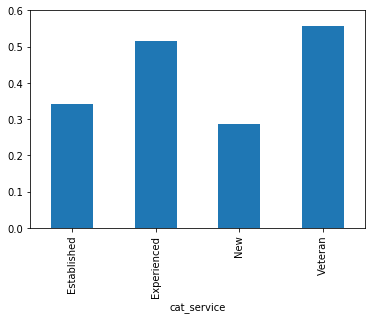

In [76]:
dis.plot.bar(ylim = (0,0.6), legend = False)

In [78]:
combined[(combined["cat_service"] == "Veteran")|(combined["cat_service"] == "Experienced")]

,id,separationtype,cease_date,position,employment_status,gender,age,institue_service,dissatisfied,institue_service_up,cat_service
0,4.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,7.0,Experienced
1,6.000000e+00,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,18.0,Veteran
3,1.000000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,15.0,Veteran
5,1.300000e+01,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,14,False,14.0,Veteran
8,2.100000e+01,Resignation,2012.0,Teacher,Permanent Full-time,Male,56-60,30,False,30.0,Veteran
9,2.200000e+01,Resignation,2012.0,Cleaner,Permanent Part-time,Female,51-55,32,False,32.0,Veteran
10,2.300000e+01,Resignation,2012.0,School Administrative Staff,Permanent Part-time,Female,46-50,15,True,15.0,Veteran
11,2.400000e+01,Resignation,2012.0,Teacher,Permanent Full-time,Female,61 or older,39,True,39.0,Veteran
12,2.600000e+01,Resignation,2012.0,Teacher,Permanent Part-time,Female,41-45,17,True,17.0,Veteran
13,2.800000e+01,Resignation,2012.0,Public Servant,Permanent Full-time,Female,21-25,7,False,7.0,Experienced
